In [6]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
import scipy.optimize as opt
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint

In [3]:
def generate_uniform(N):
    a = np.sqrt(3)
    return np.random.uniform(-a, a, N)

def generate_normal(N):
    return np.random.normal(0, 1, N)

def generate_exp(N):
    return np.random.exponential(1, N) - 1

# 1 & 2

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.95it/s]


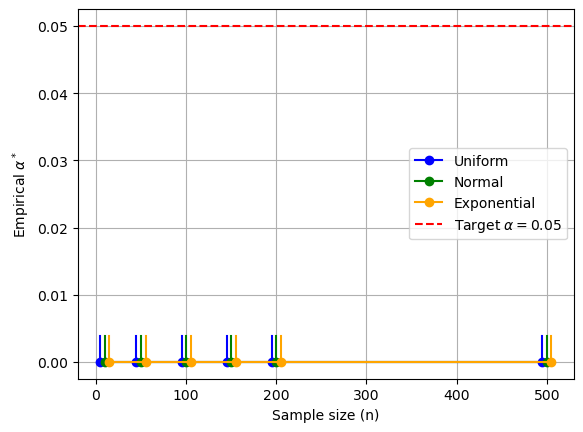

In [3]:
from scipy.stats import t

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
a_values = []
a = 5
z_critical = 1.96

for dist in [generate_uniform, generate_normal, generate_exp]:
    real_alpha_values = []
    conf_intervals = []
    for n in tqdm(n_values):
        rejections = 0
        t_critical = t.ppf(1 - alpha / 2, n-1)
        for _ in range(1000):
            data = dist(n)
            mean = np.mean(data)
            var =  np.var(data, ddof=1)
            l, r = (mean - np.sqrt(var / n) * t_critical, mean + np.sqrt(var / n) * t_critical)
            # if r < a and a > mean:
            if l > a:
                rejections += 1
        real_alpha_values.append(rejections / 1000)
        
        # se = np.sqrt(a_star * (1 - a_star) / 1000)
        # conf_intervals.append((rejections / 1000 - z_critical * se, rejections / 1000 + z_critical * se))
        conf_intervals.append(proportion_confint(rejections, 1000, alpha=alpha, method='wilson'))
    a_values.append((real_alpha_values, conf_intervals))
    
distributions = ["Uniform", "Normal", "Exponential"]
# for i, (real_alpha_values, conf_intervals)  in enumerate(a_values):
#     plt.plot(n_values, real_alpha_values, marker='o', label=f'{distributions[i]}')
colors = ['blue', 'green', 'orange']
offsets = [-5, 0, 5]

for i, (real_alpha_values, conf_intervals) in enumerate(a_values):
    means = np.array(real_alpha_values)
    lower_bounds = np.array([conf[0] for conf in conf_intervals])
    upper_bounds = np.array([conf[1] for conf in conf_intervals])
    offset_n_values = [n + offsets[i] for n in n_values] 
    
    plt.plot(offset_n_values, means, marker='o', label=f'{distributions[i]}', color=colors[i])
    for j, (n, lower, upper) in enumerate(zip(offset_n_values, lower_bounds, upper_bounds)):
        plt.plot([n, n], [lower, upper], color=colors[i], linestyle='-', linewidth=1.5)

plt.axhline(alpha, color='red', linestyle='--', label=r'Target $\alpha = 0.05$')
plt.xlabel('Sample size (n)')
plt.ylabel(r'Empirical $\alpha^*$')
plt.legend()
plt.grid()
plt.show()

# 3

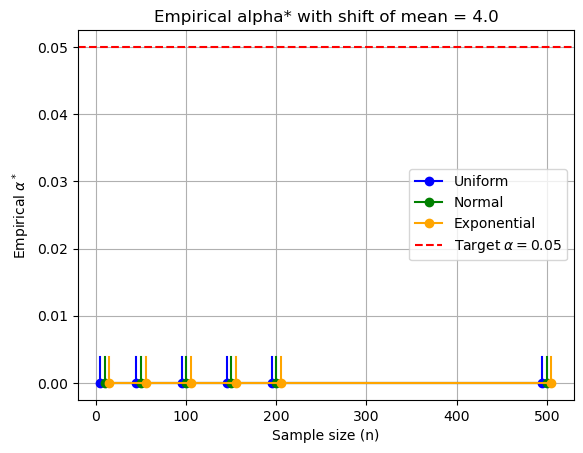

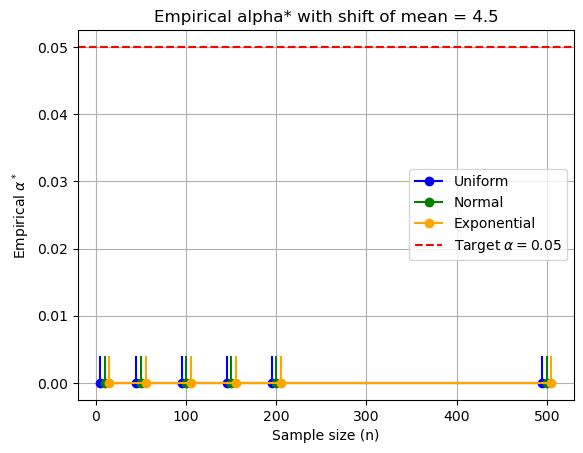

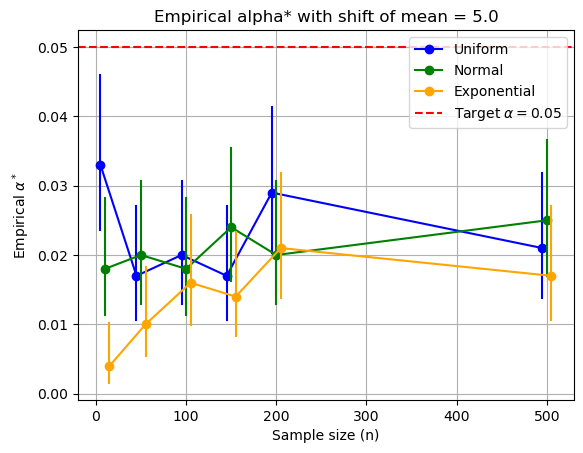

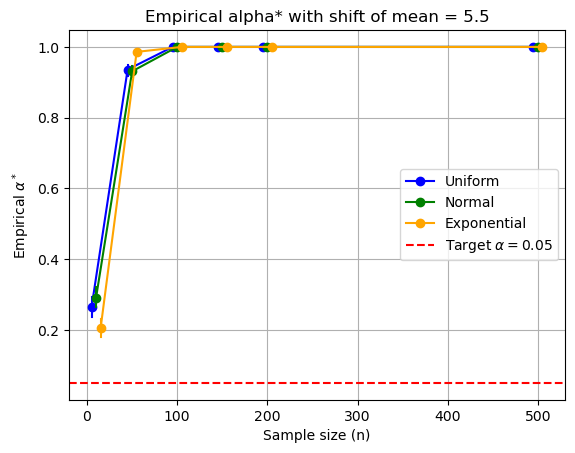

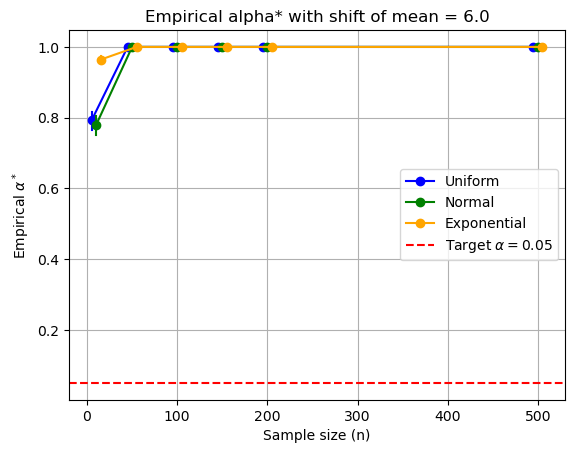

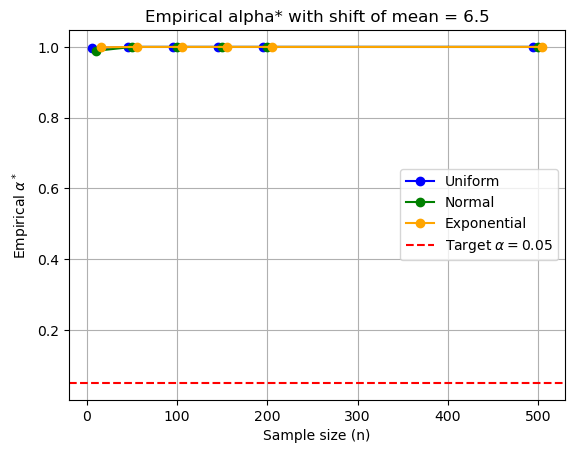

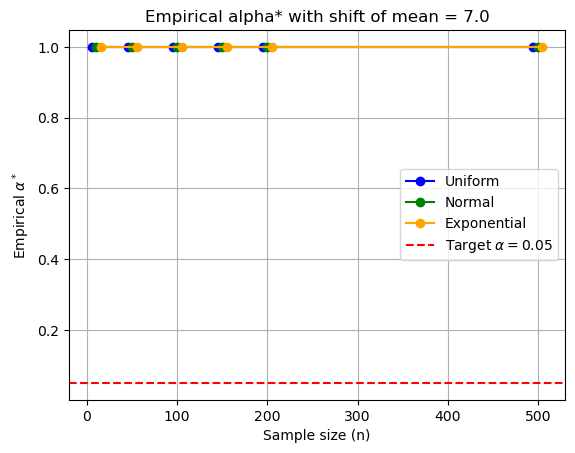

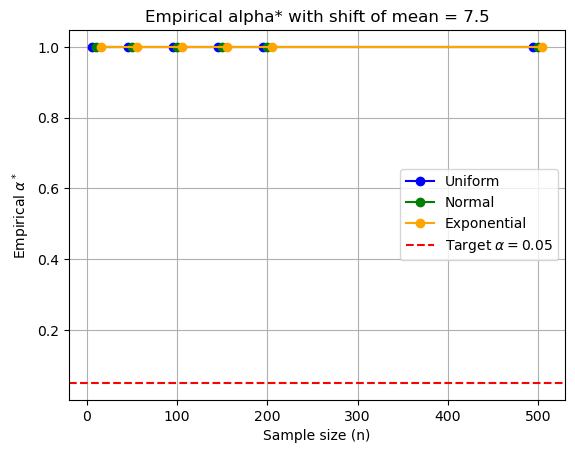

In [4]:
from scipy.stats import t

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
a = 5
additions_to_a = [i / 100 for i in range(400, 800, 50)]

for cur_add in additions_to_a:
    a_values = []
    for dist in [generate_uniform, generate_normal, generate_exp]:
        real_alpha_values = []
        conf_intervals = []
        for n in n_values:
            rejections = 0
            t_critical = t.ppf(1 - alpha / 2, n-1)
            for _ in range(1000):
                data = dist(n) + cur_add
                mean = np.mean(data)
                var =  np.var(data, ddof=1)
                l, r = (mean - np.sqrt(var / n) * t_critical, mean + np.sqrt(var / n) * t_critical)
                # if r < a and a > mean:
                if l > a:
                    rejections += 1
            real_alpha_values.append(rejections / 1000)
            
            # se = np.sqrt(a_star * (1 - a_star) / 1000)
            # conf_intervals.append((rejections / 1000 - z_critical * se, rejections / 1000 + z_critical * se))
            conf_intervals.append(proportion_confint(rejections, 1000, alpha=alpha, method='wilson'))
        a_values.append((real_alpha_values, conf_intervals))
        
    distributions = ["Uniform", "Normal", "Exponential"]
    colors = ['blue', 'green', 'orange']
    offsets = [-5, 0, 5] 
    
    for i, (real_alpha_values, conf_intervals) in enumerate(a_values):
        means = np.array(real_alpha_values)
        lower_bounds = np.array([conf[0] for conf in conf_intervals])
        upper_bounds = np.array([conf[1] for conf in conf_intervals])
        offset_n_values = [n + offsets[i] for n in n_values] 
        
        plt.plot(offset_n_values, means, marker='o', label=f'{distributions[i]}', color=colors[i])
        for j, (n, lower, upper) in enumerate(zip(offset_n_values, lower_bounds, upper_bounds)):
            plt.plot([n, n], [lower, upper], color=colors[i], linestyle='-', linewidth=1.5)
    
    plt.axhline(alpha, color='red', linestyle='--', label=r'Target $\alpha = 0.05$')
    plt.xlabel('Sample size (n)')
    plt.ylabel(r'Empirical $\alpha^*$')
    plt.legend()
    plt.title(f'Empirical alpha* with shift of mean = {cur_add}')
    plt.grid()
    plt.show()

# 4

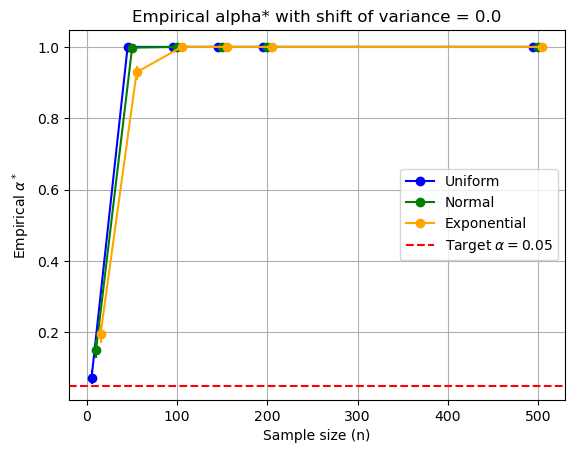

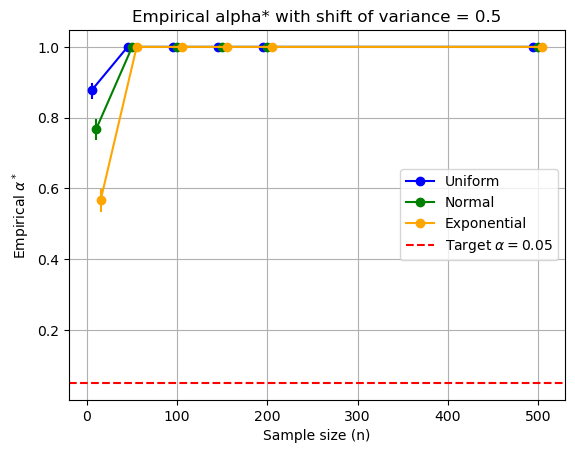

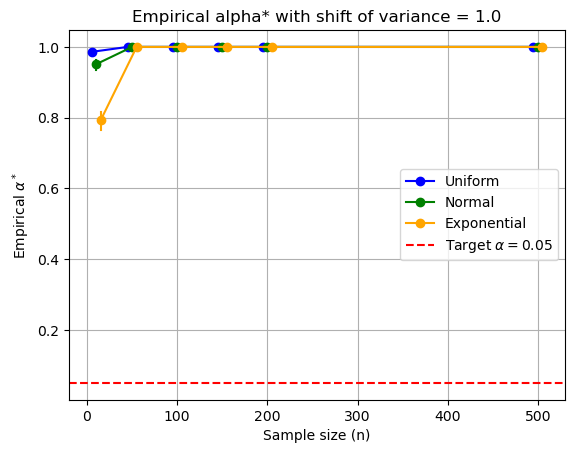

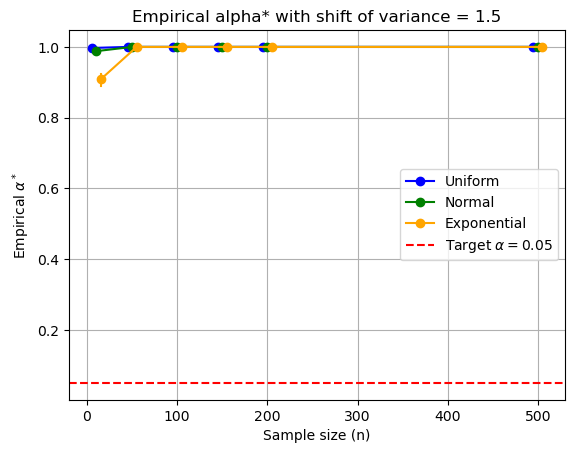

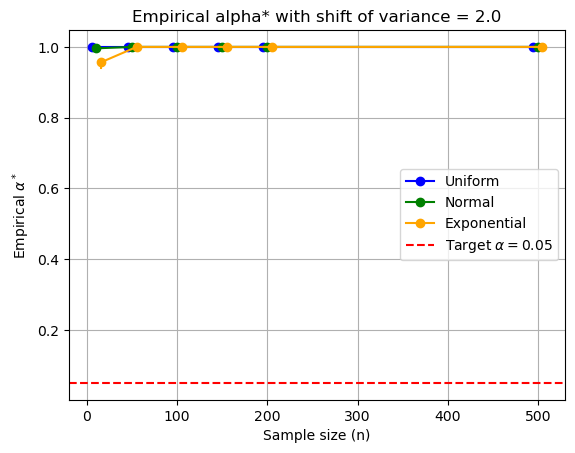

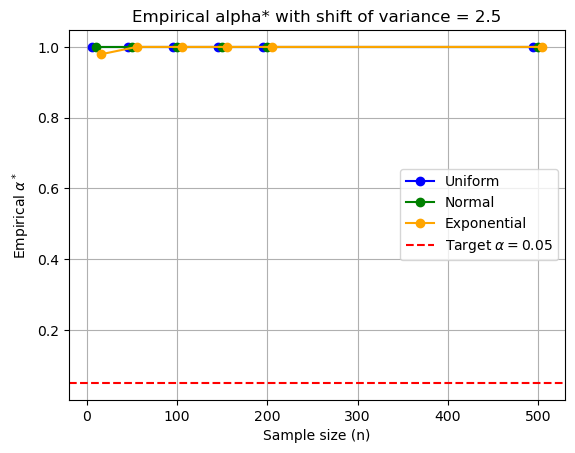

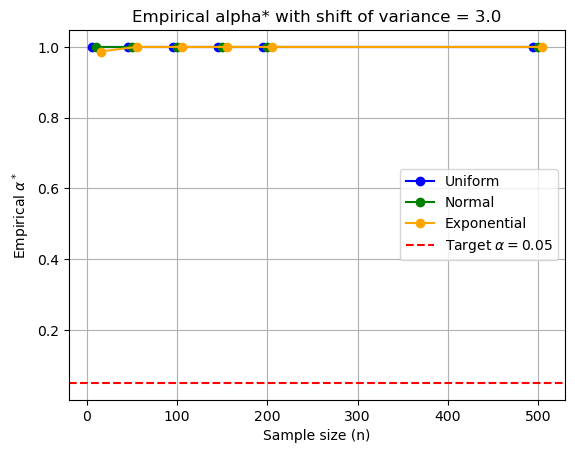

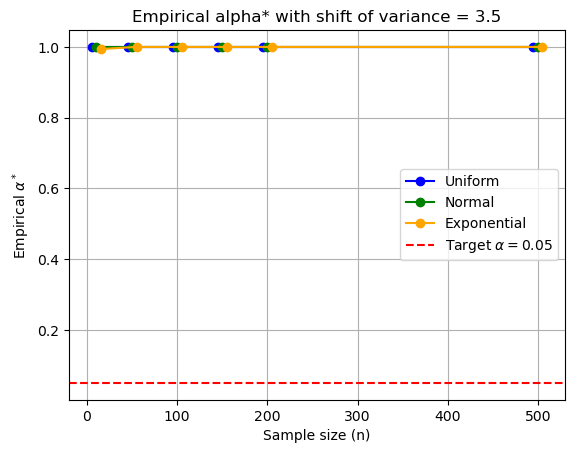

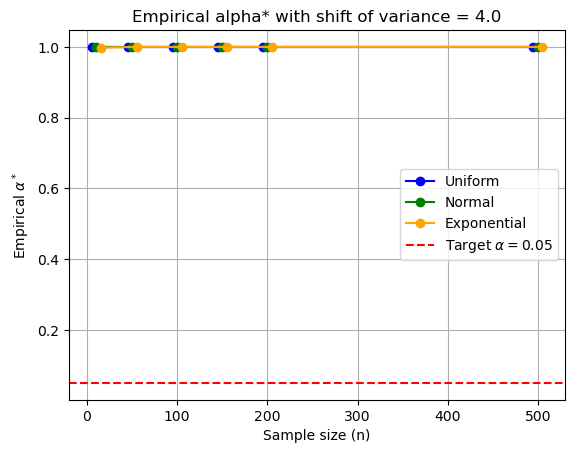

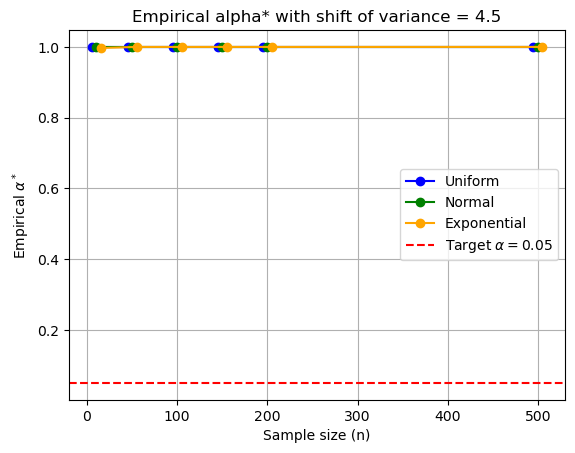

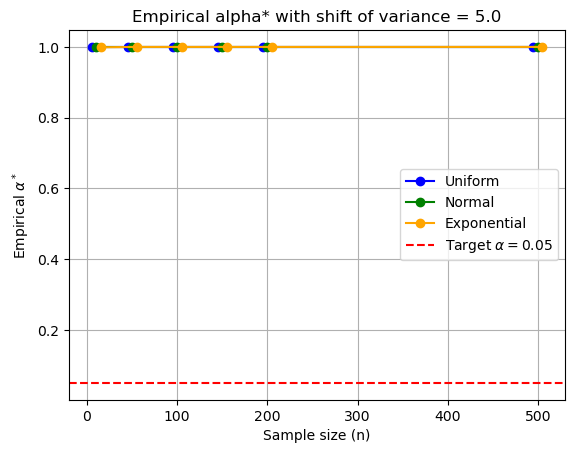

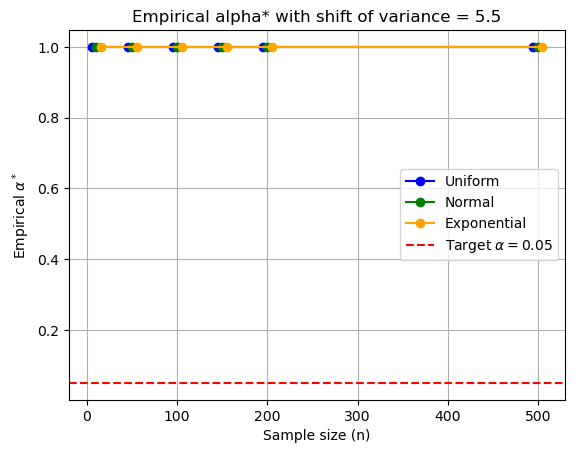

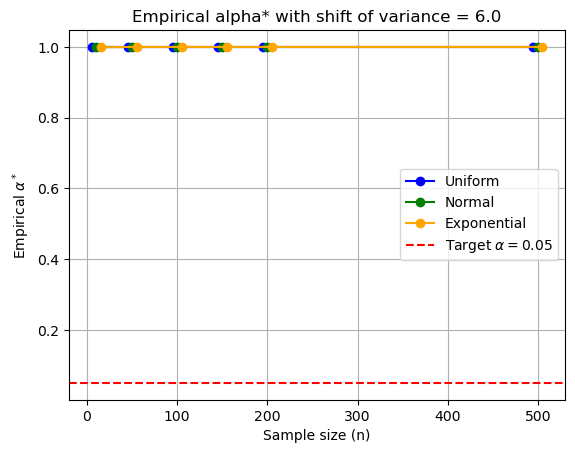

In [6]:
from scipy.stats import chi

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
sigma = 3
additions_to_sigma = [i / 100 for i in range(0, 200 * sigma + 1, 50)]

for cur_add in additions_to_sigma:
    a_values = []
    for dist in [generate_uniform, generate_normal, generate_exp]:
        real_alpha_values = []
        conf_intervals = []
        for n in n_values:
            rejections = 0
            chi_critical1 = chi.ppf(1 - alpha / 2, n-1)
            chi_critical2 = chi.ppf(alpha / 2, n-1)
            for _ in range(1000):
                data = dist(n) * (cur_add + 1)
                var =  np.var(data, ddof=1)
                l, r = (var * (n-1) / chi_critical1, var * (n-1) / chi_critical2)
                # if r < a and a > mean:
                if l > sigma:
                    rejections += 1
            real_alpha_values.append(rejections / 1000)
            
            # se = np.sqrt(a_star * (1 - a_star) / 1000)
            # conf_intervals.append((rejections / 1000 - z_critical * se, rejections / 1000 + z_critical * se))
            conf_intervals.append(proportion_confint(rejections, 1000, alpha=alpha, method='wilson'))
        a_values.append((real_alpha_values, conf_intervals))
        
    distributions = ["Uniform", "Normal", "Exponential"]
    colors = ['blue', 'green', 'orange']
    offsets = [-5, 0, 5] 
    
    for i, (real_alpha_values, conf_intervals) in enumerate(a_values):
        means = np.array(real_alpha_values)
        lower_bounds = np.array([conf[0] for conf in conf_intervals])
        upper_bounds = np.array([conf[1] for conf in conf_intervals])
        offset_n_values = [n + offsets[i] for n in n_values] 
        
        plt.plot(offset_n_values, means, marker='o', label=f'{distributions[i]}', color=colors[i])
        for j, (n, lower, upper) in enumerate(zip(offset_n_values, lower_bounds, upper_bounds)):
            plt.plot([n, n], [lower, upper], color=colors[i], linestyle='-', linewidth=1.5)
    
    plt.axhline(alpha, color='red', linestyle='--', label=r'Target $\alpha = 0.05$')
    plt.xlabel('Sample size (n)')
    plt.ylabel(r'Empirical $\alpha^*$')
    plt.legend()
    plt.title(f'Empirical alpha* with shift of variance = {cur_add}')
    plt.grid()
    plt.show()

# 5

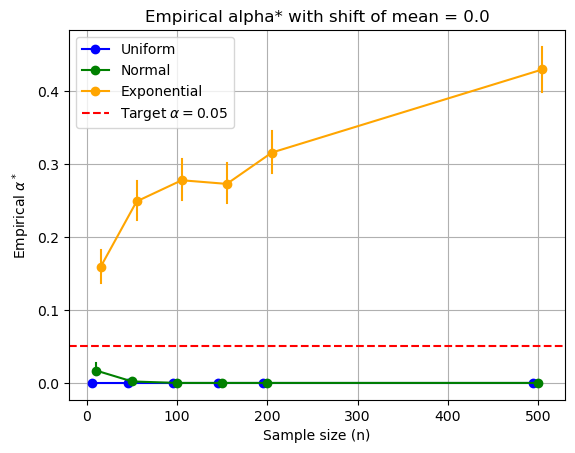

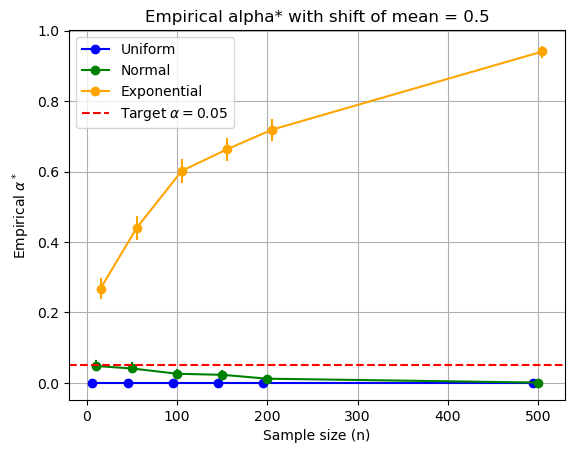

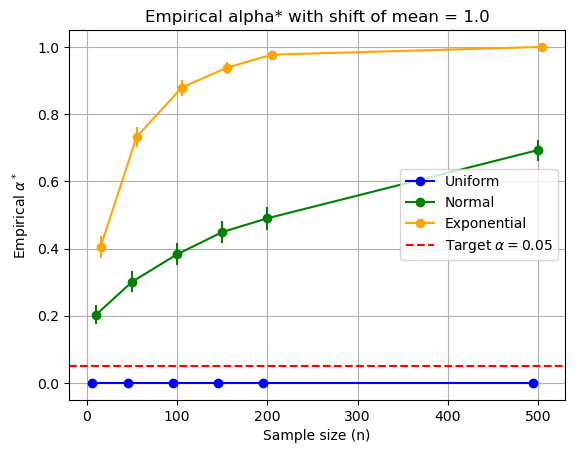

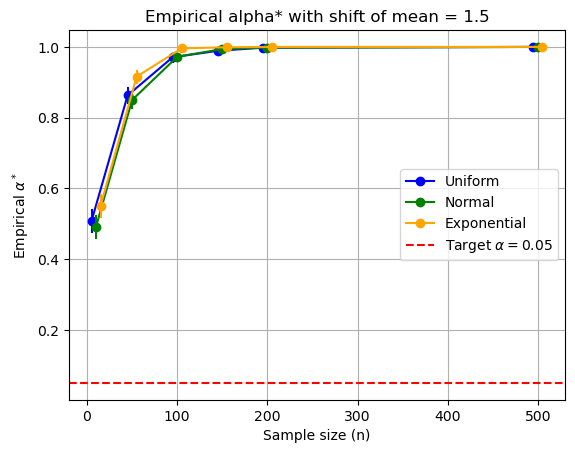

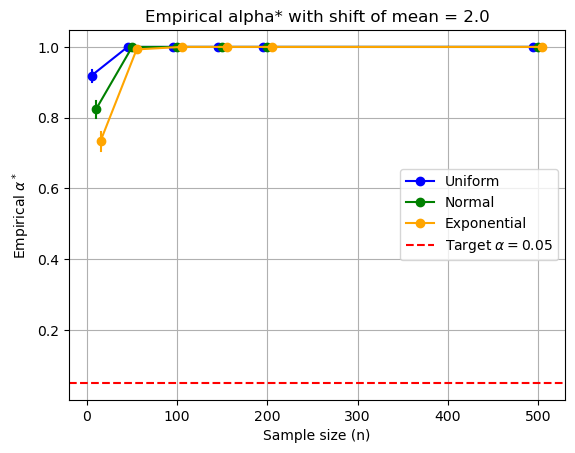

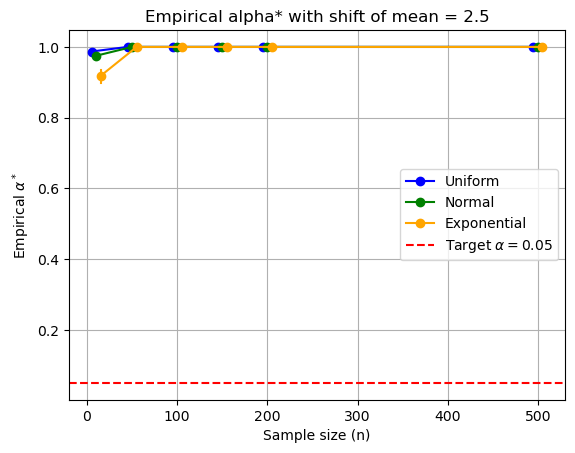

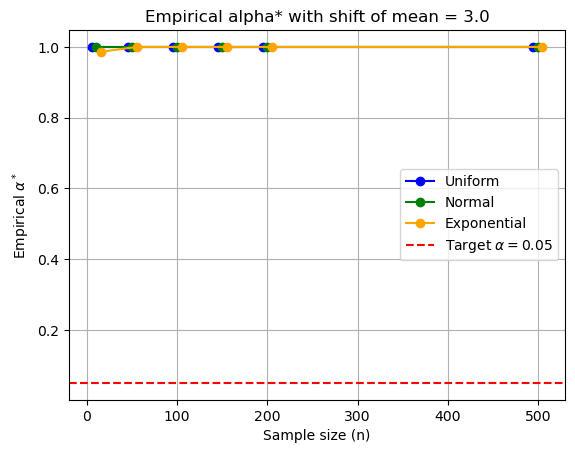

In [7]:
from scipy.stats import t

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
d = 3
q = 0.99
z_critical = 1.96
additions_to_a = [i / 100 for i in range(0, d * 100 + 1, 50)]

for cur_add in additions_to_a:
    a_values = []
    for dist in [generate_uniform, generate_normal, generate_exp]:
        real_alpha_values = []
        conf_intervals = []
        for n in n_values:
            rejections = 0
            for _ in range(1000):
                data = sorted(dist(n) + cur_add)
                k1 = int(q * n - np.sqrt(q * (1-q) * n) * z_critical)
                k2 = int(q * n + np.sqrt(q * (1-q) * n) * z_critical) + 1
                l, r = (data[max(0, k1)], data[min(n-1, k2)])
                if l > d:
                    rejections += 1
            real_alpha_values.append(rejections / 1000)
            conf_intervals.append(proportion_confint(rejections, 1000, alpha=alpha, method='wilson'))
        a_values.append((real_alpha_values, conf_intervals))
        
    distributions = ["Uniform", "Normal", "Exponential"]
    colors = ['blue', 'green', 'orange']
    offsets = [-5, 0, 5] 
    
    for i, (real_alpha_values, conf_intervals) in enumerate(a_values):
        means = np.array(real_alpha_values)
        lower_bounds = np.array([conf[0] for conf in conf_intervals])
        upper_bounds = np.array([conf[1] for conf in conf_intervals])
        offset_n_values = [n + offsets[i] for n in n_values] 
        
        plt.plot(offset_n_values, means, marker='o', label=f'{distributions[i]}', color=colors[i])
        for j, (n, lower, upper) in enumerate(zip(offset_n_values, lower_bounds, upper_bounds)):
            plt.plot([n, n], [lower, upper], color=colors[i], linestyle='-', linewidth=1.5)
    
    plt.axhline(alpha, color='red', linestyle='--', label=r'Target $\alpha = 0.05$')
    plt.xlabel('Sample size (n)')
    plt.ylabel(r'Empirical $\alpha^*$')
    plt.legend()
    plt.title(f'Empirical alpha* with shift of mean = {cur_add}')
    plt.grid()
    plt.show()

# дз

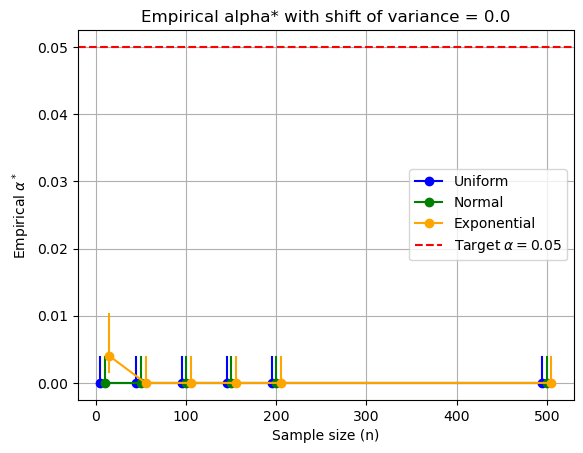

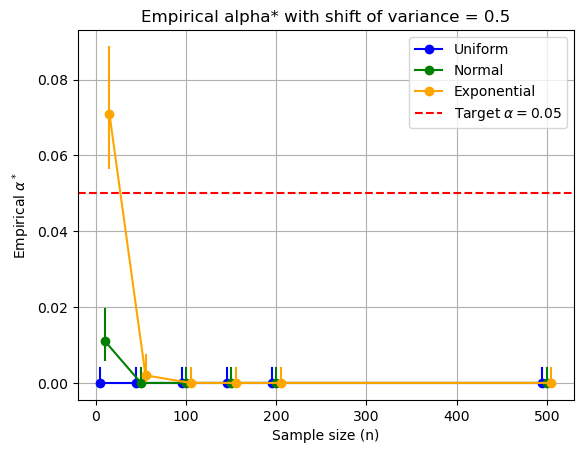

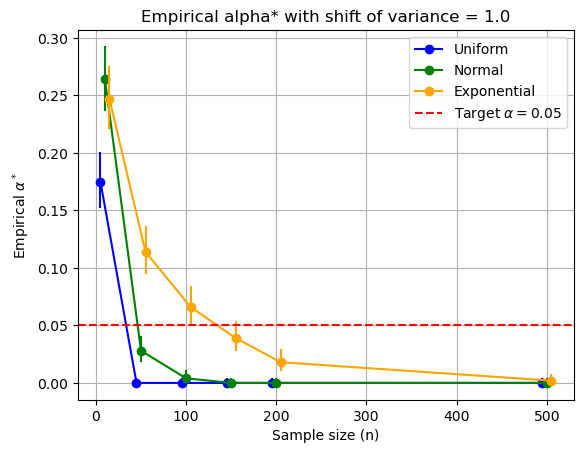

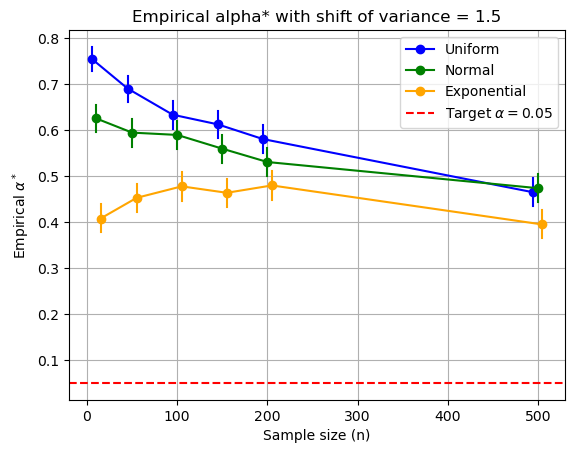

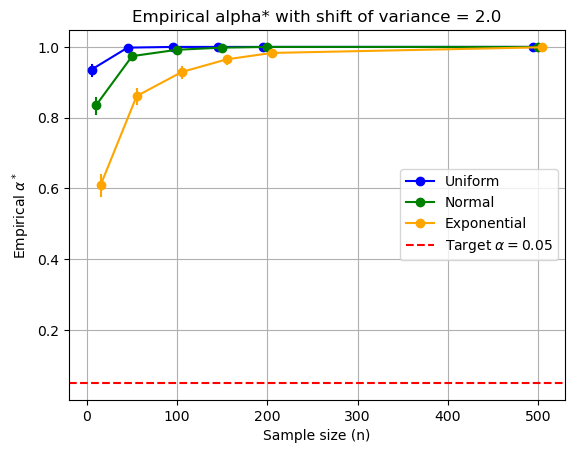

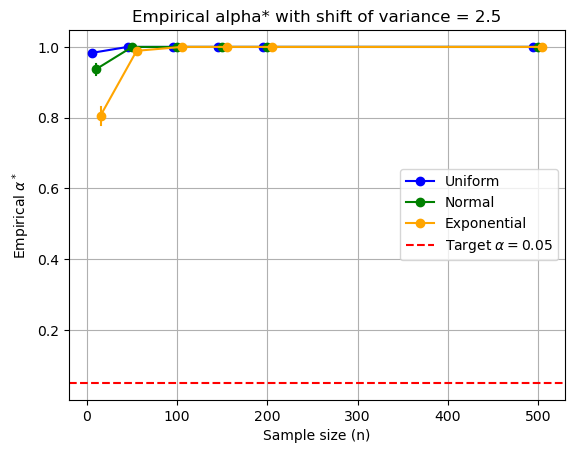

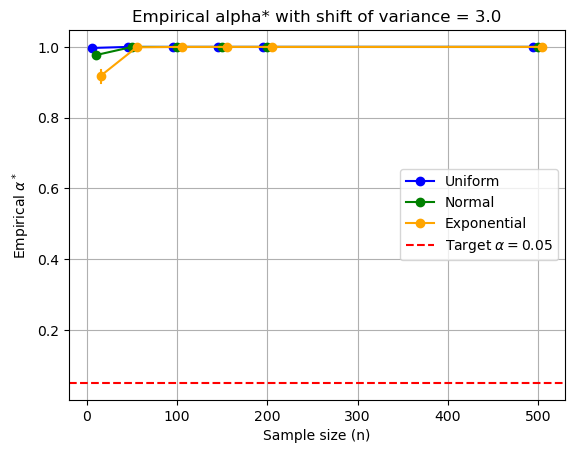

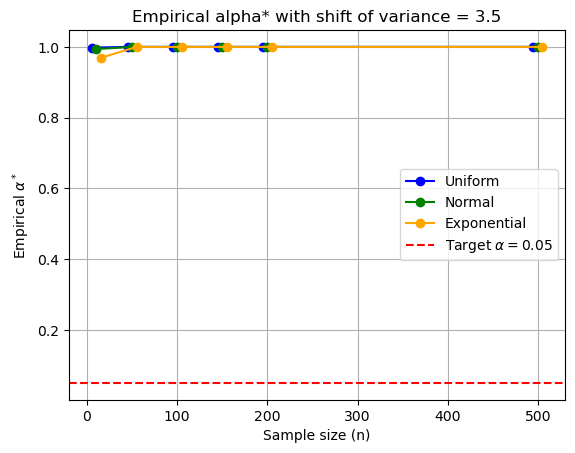

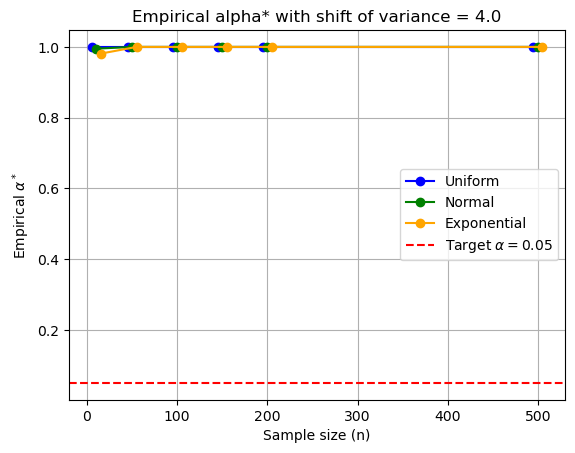

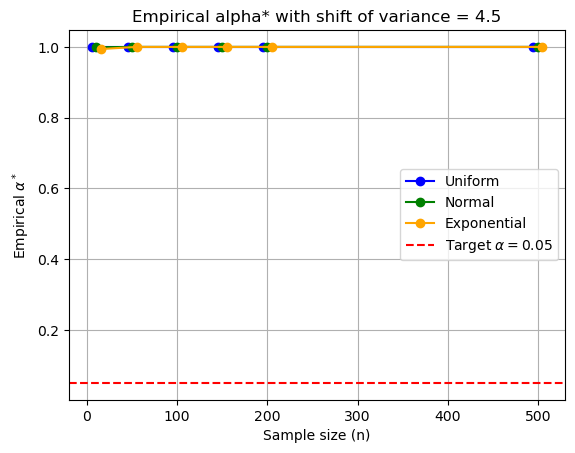

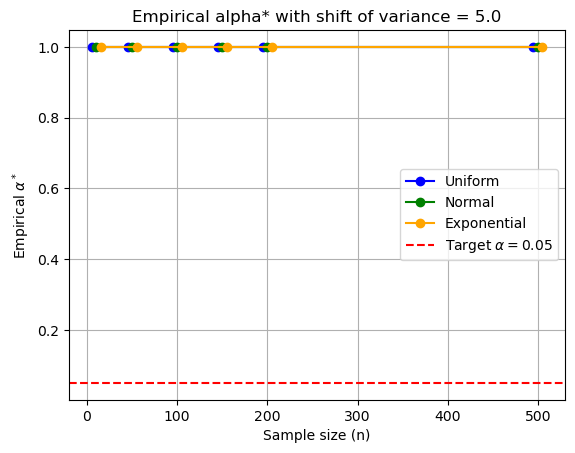

In [7]:
from scipy.stats import chi

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
t = 5
sigma = t
additions_to_sigma = [i / 100 for i in range(0, 100 * sigma + 1, 50)]

for cur_add in additions_to_sigma:
    a_values = []
    for dist in [generate_uniform, generate_normal, generate_exp]:
        real_alpha_values = []
        conf_intervals = []
        for n in n_values:
            rejections = 0
            for _ in range(1000):
                data = dist(n) * (cur_add + 1)
                data = sorted(data)
                var =  np.var(data, ddof=1)
                l, r = norm.ppf([0.025, 0.975], loc=np.mean(data), scale=np.std(data, ddof=1))
                # -t < l < r < t
                if l < -t or t < r:
                    rejections += 1
            real_alpha_values.append(rejections / 1000)
            
            conf_intervals.append(proportion_confint(rejections, 1000, alpha=alpha, method='wilson'))
        a_values.append((real_alpha_values, conf_intervals))
        
    distributions = ["Uniform", "Normal", "Exponential"]
    colors = ['blue', 'green', 'orange']
    offsets = [-5, 0, 5] 
    
    for i, (real_alpha_values, conf_intervals) in enumerate(a_values):
        means = np.array(real_alpha_values)
        lower_bounds = np.array([conf[0] for conf in conf_intervals])
        upper_bounds = np.array([conf[1] for conf in conf_intervals])
        offset_n_values = [n + offsets[i] for n in n_values] 
        
        plt.plot(offset_n_values, means, marker='o', label=f'{distributions[i]}', color=colors[i])
        for j, (n, lower, upper) in enumerate(zip(offset_n_values, lower_bounds, upper_bounds)):
            plt.plot([n, n], [lower, upper], color=colors[i], linestyle='-', linewidth=1.5)
    
    plt.axhline(alpha, color='red', linestyle='--', label=r'Target $\alpha = 0.05$')
    plt.xlabel('Sample size (n)')
    plt.ylabel(r'Empirical $\alpha^*$')
    plt.legend()
    plt.title(f'Empirical alpha* with shift of variance = {cur_add}')
    plt.grid()
    plt.show()